Reading in packages that will we used later

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [10]:
#Adjusting batch size to 32 and reducing img size from 180x180 to see if this improves model fitting performance
data_dir= "C:\\Users\\amanda.persson\\OneDrive - Accenture\\Private\\ASL images\\asl_alphabet_train\\asl_alphabet_train"
batch_size = 32
img_height = 100
img_width = 100



Reading all test data for later use

In [11]:
#Intentionally manipulated to provide less data for testing that model works
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  labels="inferred", 
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 87000 files belonging to 29 classes.
Using 17400 files for validation.


In [12]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  labels="inferred",  
  validation_split=0.01,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 87000 files belonging to 29 classes.
Using 870 files for validation.


In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Defining the model that will later be trained

In [14]:
num_classes = 29

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [17]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
272/272 [==============================] - 682s 2s/step - loss: 2.7164 - accuracy: 0.2226 - val_loss: 0.7346 - val_accuracy: 0.7713
Epoch 2/10
272/272 [==============================] - 486s 2s/step - loss: 0.6996 - accuracy: 0.7797 - val_loss: 0.2726 - val_accuracy: 0.9115
Epoch 3/10
272/272 [==============================] - 421s 2s/step - loss: 0.2537 - accuracy: 0.9186 - val_loss: 0.1231 - val_accuracy: 0.9621
Epoch 4/10
272/272 [==============================] - 466s 2s/step - loss: 0.0989 - accuracy: 0.9716 - val_loss: 0.0573 - val_accuracy: 0.9851
Epoch 5/10
272/272 [==============================] - 446s 2s/step - loss: 0.0678 - accuracy: 0.9797 - val_loss: 0.0741 - val_accuracy: 0.9713
Epoch 6/10
272/272 [==============================] - 416s 2s/step - loss: 0.0559 - accuracy: 0.9827 - val_loss: 0.0199 - val_accuracy: 0.9943
Epoch 7/10
272/272 [==============================] - 405s 1s/step - loss: 0.0274 - accuracy: 0.9933 - val_loss: 0.0192 - val_accuracy: 0.9931

Check accuracy of trained model

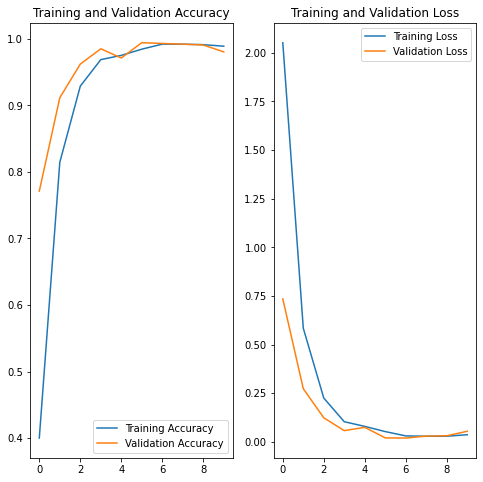

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
model.save("3Convlayer_20210314")

INFO:tensorflow:Assets written to: 3Convlayer_20210314\assets
